# Coursework 1 Group 11

Group number: 11

Student names and k-numbers:


1.   Shovit Naik ---------------------- K2458573
2.   Shashwat Chandwadkar -- K2457766
3.   Ritesh Ranjan Cashyap ---- K2449065
4.   Tanishq Tak ---------------------- K2461534



















# Load modules


In [5]:
#General ------------------------------
# Loading load_digits from scikit-learn
from sklearn.datasets import load_digits
# For plotting
import matplotlib.pyplot as plt
# For binarizing labels
from sklearn.preprocessing import label_binarize, StandardScaler
import numpy as np
# Loading train_test_split and GridSearchCV from scikit-learn
from sklearn.model_selection import train_test_split, GridSearchCV
# Importing all the necessary metrics for evaluation
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, roc_curve,confusion_matrix, ConfusionMatrixDisplay,accuracy_score,classification_report
#--------------------------------------

#Shovit Naik---------------------------
# Importing Random Forest and Decision Tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#--------------------------------------

#Ritesh Ranjan Cashyap-----------------
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#--------------------------------------

#Shashwat Chandwadkar -----------------
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#--------------------------------------

#Tanishq Tak --------------------------
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from itertools import cycle
from sklearn.metrics import auc
import seaborn as sns
#--------------------------------------


# Load Data

In [2]:
#Shovit Naik---------------------------
# Assign load_digits here
digits = load_digits()
# Assigning load_digits's data and target to X and Y
x, y = digits.data, digits.target
# Splitting the data for training and testing: 80% for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

# Binarize y_test for multi-class ROC AUC
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Default models
rfD = RandomForestClassifier(random_state=7)
dtD = DecisionTreeClassifier(random_state=7)
#Hyperparameter (using grid search for simplicity and accuracy becasuse the scale is small)
#Numbers for HP chosen from my understanding to avoid underfiting  or overfiting and bad performance
rfGrid = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 10, 20]}
dtGrid = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 10, 20]}
# Initialize GridSearchCV for hyperparameter tuning
rfH = GridSearchCV(RandomForestClassifier(random_state=7), rfGrid, cv=3, scoring='balanced_accuracy')
dtH = GridSearchCV(DecisionTreeClassifier(random_state=7), dtGrid, cv=3, scoring='balanced_accuracy')
#--------------------------------------

#Ritesh Ranjan Cashyap ----------------
#Loading the digits dataset
x,y = load_digits(return_X_y= True)
print(x,y)
#Spliting the imported dataset into 80:20 ratio, 80% training and 20% testing
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=7)

print("Data successfully split into training (80%) and testing (20%).")
print("Shape of xTrain:", xTrain.shape)
print("Shape of xTest:", xTest.shape)
print("Shape of yTrain:", yTrain.shape)
print("Shape of yTest:", yTest.shape)
#--------------------------------------

#Shashwat Chandwadkar -----------------
# Load the digits dataset
digits = load_digits()
x, y = digits.data, digits.target

# Split the data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Apply preprocessing (StandardScaler)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

# Initialize Classification techniques
svmD = SVC(random_state=7, probability=True)  # Default SVM
lrD = LogisticRegression(random_state=7, max_iter=1000)  # Default Logistic Regression
#--------------------------------------

#Tanishq Tak --------------------------
# add code for loading data

digits = load_digits()
x, y = digits.data, digits.target

# Binarize the labels for multi-class ROC
yBin = label_binarize(y, classes = range(10))
nClasses = yBin.shape[1]

xTrain_, xTest_, yTrain_, yTest_ = train_test_split(x, yBin, test_size = 0.2, random_state = 7) # random_state = 7 because SUIIII!!!!

# Standardize the features (important for KNN)
scaler = StandardScaler()
xTrain_ = scaler.fit_transform(xTrain_)
xTest_ = scaler.transform(xTest_)
#--------------------------------------

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] [0 1 2 ... 8 9 8]
Data successfully split into training (80%) and testing (20%).
Shape of xTrain: (1437, 64)
Shape of xTest: (360, 64)
Shape of yTrain: (1437,)
Shape of yTest: (360,)
Training data shape: (1437, 64)
Testing data shape: (360, 64)
Training labels shape: (1437,)
Testing labels shape: (360,)


# Classification

# Classification Method Used


1.   Random Forest
2.   Decision Tree



# Training




In [3]:
#Shovit Naik---------------------------
# Train the default models
rfD.fit(x_train, y_train)
dtD.fit(x_train, y_train)

# Train the hyperparameter-tuned models
rfH.fit(x_train, y_train)
dtH.fit(x_train, y_train)

# Get the best estimators
rfBest = rfH.best_estimator_
dtBest = dtH.best_estimator_

# Train the best estimators
rfBest.fit(x_train, y_train)
dtBest.fit(x_train, y_train)
#--------------------------------------

#Ritesh Ranjan Cashyap ----------------
#Training AdaBoost Classifier
adaboostClf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_leaf_nodes=8, random_state=7),
    n_estimators=100,
    random_state=7
)
adaboostClf.fit(xTrain, yTrain)

#Training Gradient Boosting Classifier
gbmClf = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=7
)
gbmClf.fit(xTrain, yTrain)

print("Training completed for AdaBoost and Gradient Boosting.")

#Hyperparameter tuning for AdaBoost
paramGridAda = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 1]
}
gridSearchAda = GridSearchCV(AdaBoostClassifier(estimator=DecisionTreeClassifier(max_leaf_nodes=8, random_state=7)),
                               paramGridAda, cv=5)
gridSearchAda.fit(xTrain, yTrain)
print("Parameters for AdaBoost:", gridSearchAda.best_params_)

#Hyperparameter tuning for Gradient Boosting
paramGridGbm = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 1]
}
gridSearchGbm = GridSearchCV(GradientBoostingClassifier(random_state=7),
                               paramGridGbm, cv=5)
gridSearchGbm.fit(xTrain, yTrain)
print("Parameters for Gradient Boosting:", gridSearchGbm.best_params_)

#--------------------------------------

#Shashwat Chandwadkar -----------------
svmD.fit(x_train, y_train)
lrD.fit(x_train, y_train)
#--------------------------------------

#Tanishq Tak --------------------------
# Add code for training

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(xTrain_, yTrain_.argmax(axis=1))

# Naive Bayes
nb = GaussianNB()
nb.fit(xTrain_, yTrain_.argmax(axis=1))
#--------------------------------------

Training completed for AdaBoost and Gradient Boosting.
Parameters for AdaBoost: {'learning_rate': 0.5, 'n_estimators': 150}
Parameters for Gradient Boosting: {'learning_rate': 0.3, 'n_estimators': 150}


GaussianNB()

# Evaluation

Shovit Naik

Default Model Results.........................
Random Forest - Balanced Accuracy: 0.95, ROC AUC: 1.00
Decision Tree - Balanced Accuracy: 0.85, ROC AUC: 0.92

Optimized Model Results.........................
Random Forest - Balanced Accuracy: 0.96, ROC AUC: 1.00
Decision Tree - Balanced Accuracy: 0.85, ROC AUC: 0.92


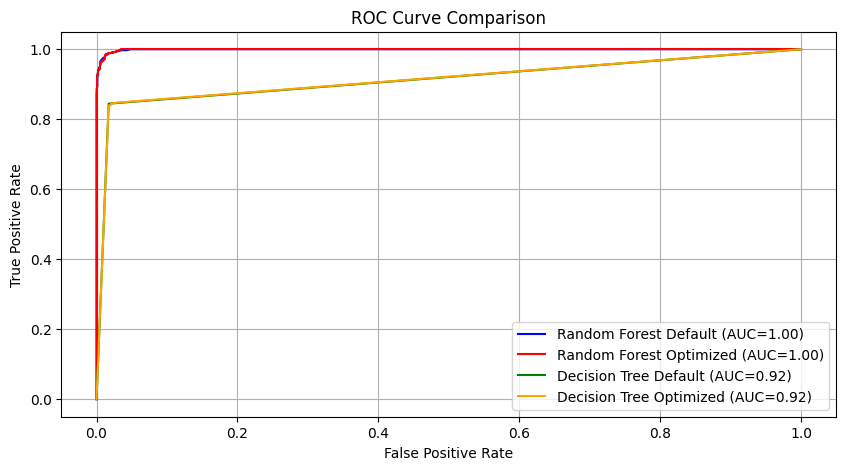

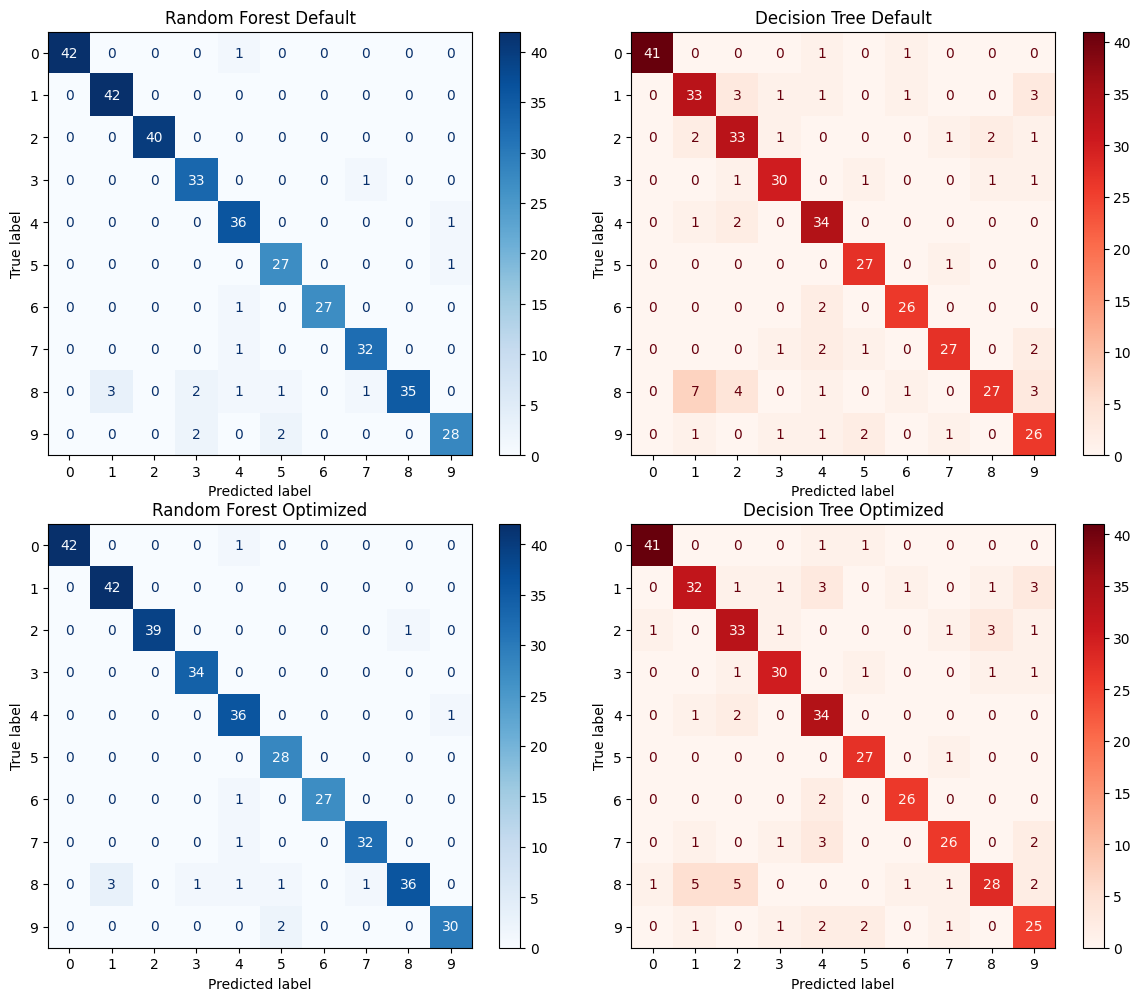


|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

Ritesh Ranjan Cashyap

AdaBoost Accuracy: 0.9389
Gradient Boosting Accuracy: 0.9667
Confusion Matrix for AdaBoost:
 [[43  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  1  0]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  1  0  1  1  1]
 [ 0  0  0  0 35  0  1  0  0  1]
 [ 0  0  0  0  0 27  0  0  0  1]
 [ 0  1  0  0  1  0 26  0  0  0]
 [ 0  0  0  0  0  0  0 32  0  1]
 [ 0  2  0  2  1  0  0  2 35  1]
 [ 0  1  0  0  0  1  0  0  1 29]]
Confusion Matrix for Gradient Boosting:
 [[42  0  0  0  1  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0  1]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  1]
 [ 0  0  0  0  0 28  0  0  0  0]
 [ 0  0  0  0  0  0 27  0  1  0]
 [ 0  0  0  0  0  0  0 32  0  1]
 [ 1  1  0  1  0  0  0  1 39  0]
 [ 0  1  0  1  0  1  0  0  0 29]]
Classification Report for AdaBoost:
               precision    recall  f1-score   su

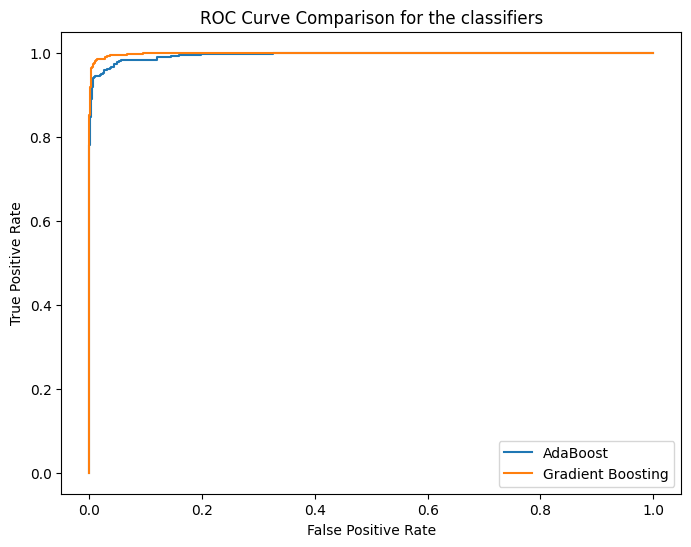


|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

Shashwat Chandwadkar

SVM Default - Accuracy: 99.44%, ROC AUC: 99.99%
Logistic Regression Default - Accuracy: 96.39%, ROC AUC: 99.88%


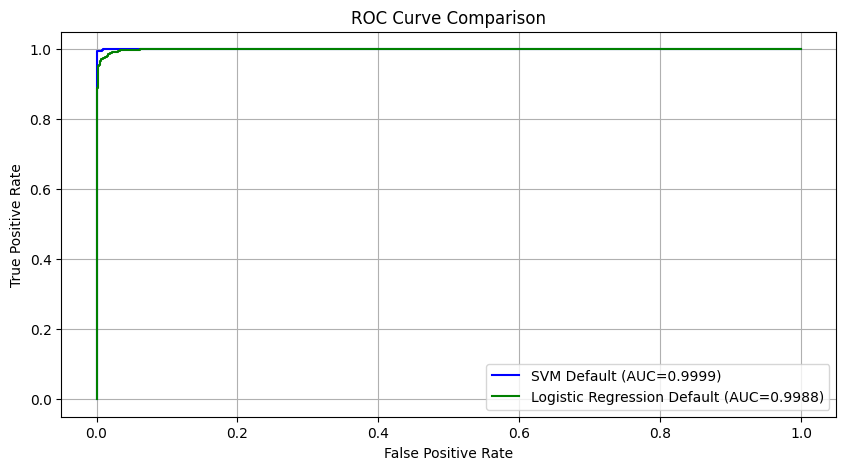


|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

Tanishq Tak

Evaluation for KNN:
Balanced Accuracy: 0.9699
ROC AUC (Macro): 0.9955


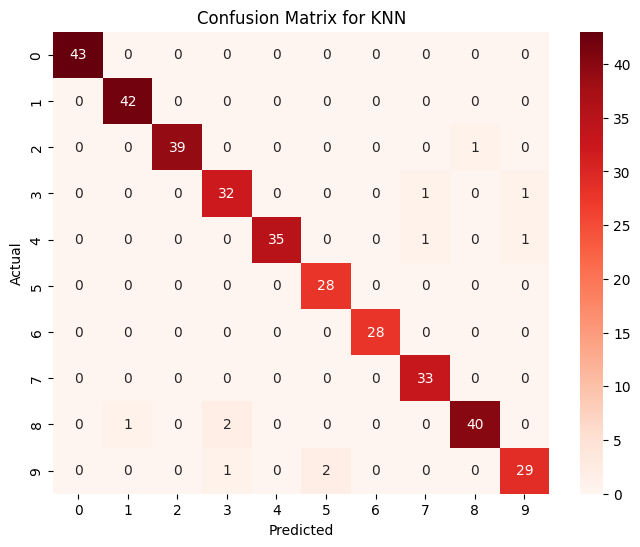

Evaluation for Naive Bayes:
Balanced Accuracy: 0.7770
ROC AUC (Macro): 0.9733


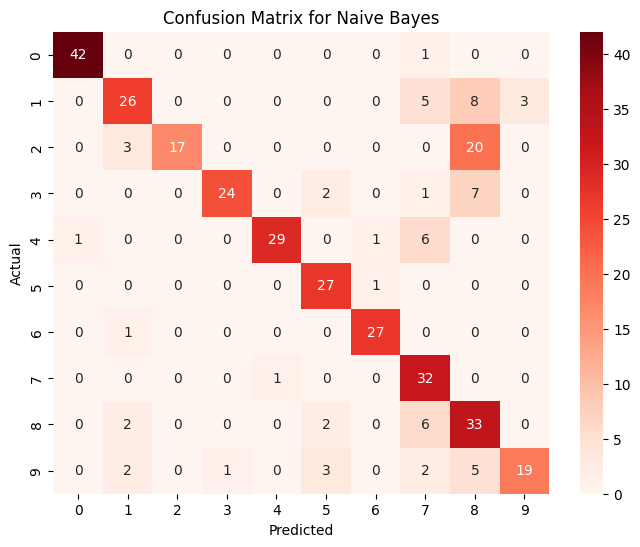

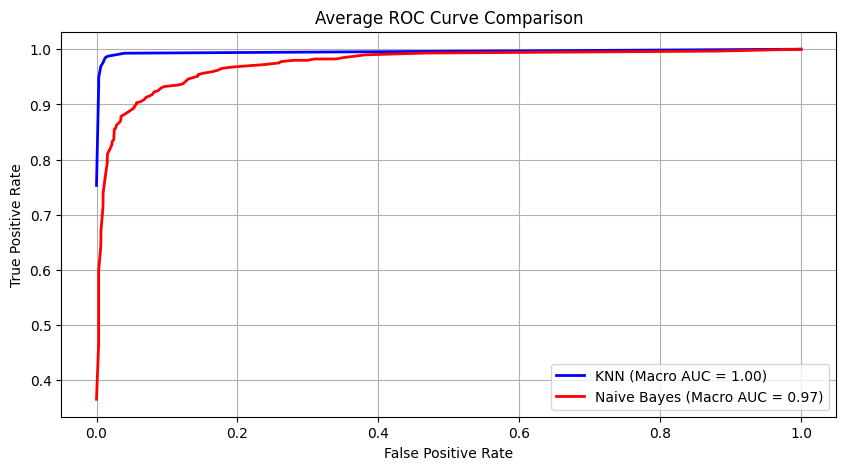


|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||



In [7]:
#Shovit Naik---------------------------
print('Shovit Naik')
print('')
# Comparison between default and optimized models
def comparison_evaluation(model, X_test, y_test, y_test_bin):
    y_pred = model.predict(X_test)  # Predictions for balanced accuracy
    y_score = model.predict_proba(X_test)  # Probabilities for ROC AUC
    bacc = balanced_accuracy_score(y_test, y_pred)  # Balanced accuracy
    roc_auc = roc_auc_score(y_test_bin, y_score, multi_class='ovr', average='macro')  # ROC AUC (macro-averaged)
    return bacc, roc_auc, y_pred, y_score

# Default model evaluations
rfD_bacc, rfD_roc_auc, rfD_y_pred, rfD_y_score = comparison_evaluation(rfD, x_test, y_test, y_test_bin)
dtD_bacc, dtD_roc_auc, dtD_y_pred, dtD_y_score = comparison_evaluation(dtD, x_test, y_test, y_test_bin)
# Optimized model evaluations
rfH_bacc, rfH_roc_auc, rfH_y_pred, rfH_y_score = comparison_evaluation(rfBest, x_test, y_test, y_test_bin)
dtH_bacc, dtH_roc_auc, dtH_y_pred, dtH_y_score = comparison_evaluation(dtBest, x_test, y_test, y_test_bin)

# Printing results
print("Default Model Results.........................")
print(f"Random Forest - Balanced Accuracy: {rfD_bacc:.2f}, ROC AUC: {rfD_roc_auc:.2f}")
print(f"Decision Tree - Balanced Accuracy: {dtD_bacc:.2f}, ROC AUC: {dtD_roc_auc:.2f}")

print("\nOptimized Model Results.........................")
print(f"Random Forest - Balanced Accuracy: {rfH_bacc:.2f}, ROC AUC: {rfH_roc_auc:.2f}")
print(f"Decision Tree - Balanced Accuracy: {dtH_bacc:.2f}, ROC AUC: {dtH_roc_auc:.2f}")

# Plotting ROC curves
plt.figure(figsize=(10, 5))
#comparing False positive and true positive for Default
fpr_rfD, tpr_rfD, _ = roc_curve(y_test_bin.ravel(), rfD_y_score.ravel())
fpr_dtD, tpr_dtD, _ = roc_curve(y_test_bin.ravel(), dtD_y_score.ravel())
#comparing fpr anf tpr for Hypertuned Model
fpr_rfH, tpr_rfH, _ = roc_curve(y_test_bin.ravel(), rfH_y_score.ravel())
fpr_dtH, tpr_dtH, _ = roc_curve(y_test_bin.ravel(), dtH_y_score.ravel())
#plotting graph
plt.plot(fpr_rfD, tpr_rfD, label=f"Random Forest Default (AUC={rfD_roc_auc:.2f})", color="blue")
plt.plot(fpr_rfH, tpr_rfH, label=f"Random Forest Optimized (AUC={rfH_roc_auc:.2f})", color="red")
plt.plot(fpr_dtD, tpr_dtD, label=f"Decision Tree Default (AUC={dtD_roc_auc:.2f})", color="green")
plt.plot(fpr_dtH, tpr_dtH, label=f"Decision Tree Optimized (AUC={dtH_roc_auc:.2f})", color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()

# Plotting confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

cm_rfD = confusion_matrix(y_test, rfD_y_pred)
cm_dtD = confusion_matrix(y_test, dtD_y_pred)
cm_rfH = confusion_matrix(y_test, rfH_y_pred)
cm_dtH = confusion_matrix(y_test, dtH_y_pred)

ConfusionMatrixDisplay(cm_rfD, display_labels=digits.target_names).plot(ax=axes[0, 0], cmap='Blues')
axes[0, 0].set_title("Random Forest Default")

ConfusionMatrixDisplay(cm_dtD, display_labels=digits.target_names).plot(ax=axes[0, 1], cmap='Reds')
axes[0, 1].set_title("Decision Tree Default")

ConfusionMatrixDisplay(cm_rfH, display_labels=digits.target_names).plot(ax=axes[1, 0], cmap='Blues')
axes[1, 0].set_title("Random Forest Optimized")

ConfusionMatrixDisplay(cm_dtH, display_labels=digits.target_names).plot(ax=axes[1, 1], cmap='Reds')
axes[1, 1].set_title("Decision Tree Optimized")

plt.tight_layout()
plt.show()
print('')
print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
print('')
#--------------------------------------

#Ritesh Ranjan Cashyap ----------------
print('Ritesh Ranjan Cashyap')
print('')
#Making predictions
yPredAda = adaboostClf.predict(xTest)
yPredGbm = gbmClf.predict(xTest)

#Printing Accuracy for classifiers
print(f"AdaBoost Accuracy: {accuracy_score(yTest, yPredAda):.4f}")
print(f"Gradient Boosting Accuracy: {accuracy_score(yTest, yPredGbm):.4f}")

#Confusion Matrices for classifiers
print("Confusion Matrix for AdaBoost:\n", confusion_matrix(yTest, yPredAda))
print("Confusion Matrix for Gradient Boosting:\n", confusion_matrix(yTest, yPredGbm))

#Classification Reports for classifiers
print("Classification Report for AdaBoost:\n", classification_report(yTest, yPredAda))
print("Classification Report for Gradient Boosting:\n", classification_report(yTest, yPredGbm))
#Comparing the Training vs Test Accuracy
trainAccAda = accuracy_score(yTrain, adaboostClf.predict(xTrain))
testAccAda = accuracy_score(yTest, yPredAda)

trainAccGbm = accuracy_score(yTrain, gbmClf.predict(xTrain))
testAccGbm = accuracy_score(yTest, yPredGbm)

print(f"AdaBoost Training Accuracy: {trainAccAda:.4f}, Test Accuracy: {testAccAda:.4f}")
print(f"Gradient Boosting Training Accuracy: {trainAccGbm:.4f}, Test Accuracy: {testAccGbm:.4f}")

#Binarize the labels for multiclass ROC comparision
yTestBin = label_binarize(yTest, classes=np.unique(yTest))
adaProba = adaboostClf.predict_proba(xTest)
gbmProba = gbmClf.predict_proba(xTest)

#Computing the ROC Curve
fprAda, tprAda, _ = roc_curve(yTestBin.ravel(), adaProba.ravel())
fprGbm, tprGbm, _ = roc_curve(yTestBin.ravel(), gbmProba.ravel())

#Plotting the ROC Curve for the classifiers
plt.figure(figsize=(8,6))
plt.plot(fprAda, tprAda, label="AdaBoost")
plt.plot(fprGbm, tprGbm, label="Gradient Boosting")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison for the classifiers")
plt.show()
print('')
print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
print('')
#--------------------------------------

#Shashwat Chandwadkar -----------------
print('Shashwat Chandwadkar')
print('')

# Evaluation (code)

# Function to evaluate models
def comparison_evaluation(model, x_test, y_test, y_test_bin):
    y_pred = model.predict(x_test)
    y_score = model.predict_proba(x_test)
    bacc = balanced_accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(label_binarize(y_test, classes=np.unique(y_test)), y_score, multi_class='ovr')
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    return bacc, roc_auc, y_pred, y_score, accuracy

# Evaluate the models
svmD_bacc, svmD_roc_auc, svmD_y_pred, svmD_y_score, svmD_accuracy = comparison_evaluation(svmD, x_test, y_test, y_test_bin)
lrD_bacc, lrD_roc_auc, lrD_y_pred, lrD_y_score, lrD_accuracy = comparison_evaluation(lrD, x_test, y_test, y_test_bin)

# Print accuracy and ROC AUC in percentage format
print("SVM Default - Accuracy: {:.2f}%, ROC AUC: {:.2f}%".format(svmD_accuracy * 100, svmD_roc_auc * 100))
print("Logistic Regression Default - Accuracy: {:.2f}%, ROC AUC: {:.2f}%".format(lrD_accuracy * 100, lrD_roc_auc * 100))

# Plotting ROC curves
plt.figure(figsize=(10, 5))

# ROC curves for Default models
fpr_svmD, tpr_svmD, _ = roc_curve(y_test_bin.ravel(), svmD_y_score.ravel())
fpr_lrD, tpr_lrD, _ = roc_curve(y_test_bin.ravel(), lrD_y_score.ravel())

# Plotting ROC curves with AUC values annotated
plt.plot(fpr_svmD, tpr_svmD, label=f"SVM Default (AUC={svmD_roc_auc:.4f})", color="blue")
plt.plot(fpr_lrD, tpr_lrD, label=f"Logistic Regression Default (AUC={lrD_roc_auc:.4f})", color="green")

# Add labels, title, and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid()
plt.show()

print('')
print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
print('')
#--------------------------------------

#Tanishq Tak --------------------------
print('Tanishq Tak')
print('')

# Add code for evaluation

def Evaluate(models, xTest_, yTest_, modelNames):
    nClasses = yTest_.shape[1]

    for model, name in zip(models, modelNames):
        yPredict = model.predict(xTest_)
        yProba = model.predict_proba(xTest_)

        print(f"Evaluation for {name}:")

        # Balanced Accuracy
        balanceAccuracy = balanced_accuracy_score(yTest_.argmax(axis=1), yPredict)
        print(f"Balanced Accuracy: {balanceAccuracy:.4f}")

        # ROC AUC (macro-averaged)
        rocAuc = roc_auc_score(yTest_, yProba, multi_class = "ovr", average = "macro")
        print(f"ROC AUC (Macro): {rocAuc:.4f}")

        # Confusion Matrix
        confusionMatrix = confusion_matrix(yTest_.argmax(axis=1), yPredict)
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusionMatrix, annot = True, fmt = "d", cmap = "Reds", xticklabels = range(nClasses), yticklabels = range(nClasses))
        plt.title(f"Confusion Matrix for {name}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

def PlotAvgCurve(models, xTest_, yTest_, modelNames):
      plt.figure(figsize=(10, 5))
      colors = ["blue", "red"]

      for model, name, color in zip(models, modelNames, colors):
          yProba = model.predict_proba(xTest_)

          # Compute macro-averaged ROC curve
          nClasses = yTest_.shape[1]
          falsePositiveRate = dict()
          truePositiveRate = dict()
          rocAuc = dict()

          for i in range(nClasses):
              falsePositiveRate[i], truePositiveRate[i], _ = roc_curve(yTest_[:, i], yProba[:, i])
              rocAuc[i] = auc(falsePositiveRate[i], truePositiveRate[i])

          allFalsePositiveRate = np.unique(np.concatenate([falsePositiveRate[i] for i in range(nClasses)]))
          meanTruePositiveRate = np.zeros_like(allFalsePositiveRate)

          for i in range(nClasses):
              meanTruePositiveRate += np.interp(allFalsePositiveRate, falsePositiveRate[i], truePositiveRate[i])

          meanTruePositiveRate /= nClasses
          macroAuc = auc(allFalsePositiveRate, meanTruePositiveRate)
          plt.plot(allFalsePositiveRate, meanTruePositiveRate, color=color, lw = 2, label = f"{name} (Macro AUC = {macroAuc:.2f})")

      plt.xlabel("False Positive Rate")
      plt.ylabel("True Positive Rate")
      plt.title("Average ROC Curve Comparison")
      plt.legend(loc="lower right")
      plt.grid()
      plt.show()

Evaluate([knn], xTest_, yTest_, ["KNN"])
Evaluate([nb], xTest_, yTest_, ["Naive Bayes"])

PlotAvgCurve([knn, nb], xTest_, yTest_, ["KNN", "Naive Bayes"])

print('')
print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
print('')
#--------------------------------------

# References

Shovit Naik

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://scikit-learn.org/stable/modules/tree.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

https://matplotlib.org/stable/gallery/text_labels_and_annotations/titles_demo.html#sphx-glr-gallery-text-labels-and-annotations-titles-demo-py

https://matplotlib.org/stable/tutorials/pyplot.html#sphx-glr-tutorials-pyplot-py

https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

https://sklearn-evaluation.ploomber.io/en/latest/classification/compare.html

https://sklearn-evaluation.ploomber.io/en/latest/classification/optimization.html

https://sklearn-evaluation.ploomber.io/en/latest/classification/basic.html

Used Google Colab AI for fixing errors in syntax and use the Intellisense.